# SPAM EMAIL DETECTION WITH MACHINE LEARNING 

We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content. In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Lets get started!

#### import packages

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 

#### Load Dataset

In [8]:
spam = pd.read_excel('Spam Email Detection.xlsx')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<b>Text Processing</b>

Cleaning the Raw Data

In [9]:
spam.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [10]:
spam.rename({'v1': 'spam','v2':'text'},axis=1,inplace=True)

In [11]:
spam.columns

Index(['spam', 'text'], dtype='object')

Replace NaN values with empty strings

In [12]:
spam = spam.where((pd.notnull(spam)),'')

Lowering Case

In [13]:
spam["text"] = spam["text"].str.lower()

Removal of special characters

In [14]:
import string
spam["text"] = spam["text"].str.translate(str.maketrans(dict.fromkeys(string.punctuation)))

Removal of stop words

In [15]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
spam["text"] = [ 
    ' '.join([word for word in str(sentence).split() if word not in ENGLISH_STOP_WORDS]) 
    if isinstance(sentence, str) else sentence
    for sentence in spam["text"]
]

<b>Label Encoding</b>

In [16]:
# label spam mail as 0;  ham mail as 1;

spam.loc[spam['spam'] == 'spam', 'spam',] = 0
spam.loc[spam['spam'] == 'ham', 'spam',] = 1

spam['spam'] = spam['spam'].astype(int)

In [17]:
# separating the data as texts and label

X = spam['text']
Y = spam['spam']

<b> Train-Test Spliting </b>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


<b>Feature Extraction</b>

Tokenizing the Cleaned Data

In [20]:
X_train = X_train.fillna("")  # Replace NaN values with empty strings
X_test = X_test.fillna("")    # Replace NaN values with empty strings

from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [21]:
print(X_train_features)

  (0, 801)	0.31887957848447357
  (0, 4268)	0.24125251984682808
  (0, 4608)	0.3854450460609683
  (0, 7093)	0.2017338136090568
  (0, 3605)	0.31887957848447357
  (0, 2251)	0.3899228546341958
  (0, 3317)	0.44005641784327315
  (0, 3449)	0.25631420912499425
  (0, 3598)	0.21950445515173386
  (0, 4853)	0.29932552906580623
  (1, 7397)	0.6198087062380064
  (1, 6901)	0.4813256022103305
  (1, 8065)	0.6198087062380064
  (2, 1008)	0.46341694483495827
  (2, 2232)	0.40496046001617
  (2, 3634)	0.31588920258947145
  (2, 4202)	0.377779742461184
  (2, 2371)	0.40496046001617
  (2, 6266)	0.46341694483495827
  (3, 6603)	0.4898103954768556
  (3, 1710)	0.5961059277184964
  (3, 1963)	0.36994716550045353
  (3, 8075)	0.5175737572171306
  (4, 2683)	0.740976256188014
  (4, 5444)	0.45020066003763853
  :	:
  (4453, 1074)	0.6760129013031282
  (4453, 7830)	0.5787739591782677
  (4453, 1888)	0.45610005640082985
  (4454, 3197)	0.4255493332230572
  (4454, 2205)	0.3829087496427867
  (4454, 3263)	0.3442384054025803
  (4454, 

<b>Training the Model</b>
<br/>Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [23]:
from sklearn.metrics import accuracy_score
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [24]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9623064841821853


In [25]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [26]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9632286995515695


<b>Performance Metrics</b>

In [27]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(Y_test,prediction_on_test_data)
tn, fp, fn, tp = confusion_matrix(Y_test,prediction_on_test_data).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(Y_test, prediction_on_test_data)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_test, prediction_on_test_data)))
print("F1 Score: {:.2f}%".format(100 * f1_score(Y_test,prediction_on_test_data)))

Precision: 96.00%
Recall: 99.90%
F1 Score: 97.91%


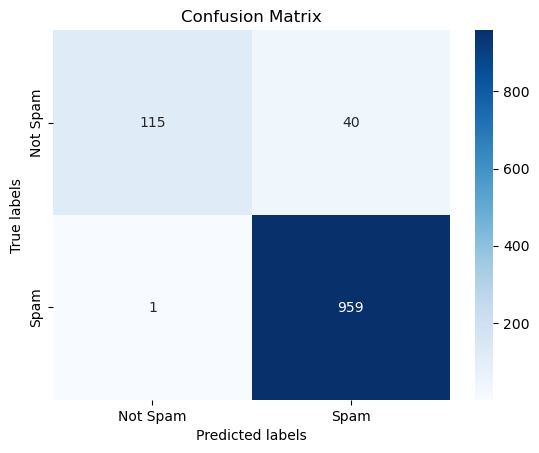

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);